/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/FACET_model_current/telescopewithmirror2/run0.csv
/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/FACET_model_current/telescopewithmirror2/run1.csv
/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/FACET_model_current/telescopewithmirror2/run2.csv
/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/FACET_model_current/telescopewithmirror2/run3.csv
/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/FACET_model_current/telescopewithmirror2/run4.csv
/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/FACET_model_current/telescopewithmirror2/run5.csv
/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/FACET_model_current/telescopewithmirror2/run6.csv
/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/FACET_model_current/telescopewithmirror2/run7.csv
/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/FACET_model_current/telescopewithmirror2/run8.csv
/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/FACET_model_current/telescopewithmirror2/run9.csv
/Users/eseguraca.6/D

/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[  5.00000006   1.35495071   2.27192176   5.89843893   9.52500685
  13.1515825   14.03838658  14.02572386  14.03116463  14.03558446
  14.00077422]
[0, 568.0, 1001.706, 1435.412, 1869.1179999999999, 2168.0, 2784.4000000000001, 3400.8000000000002, 4017.2000000000003, 4633.6000000000004, 5250.0]


/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


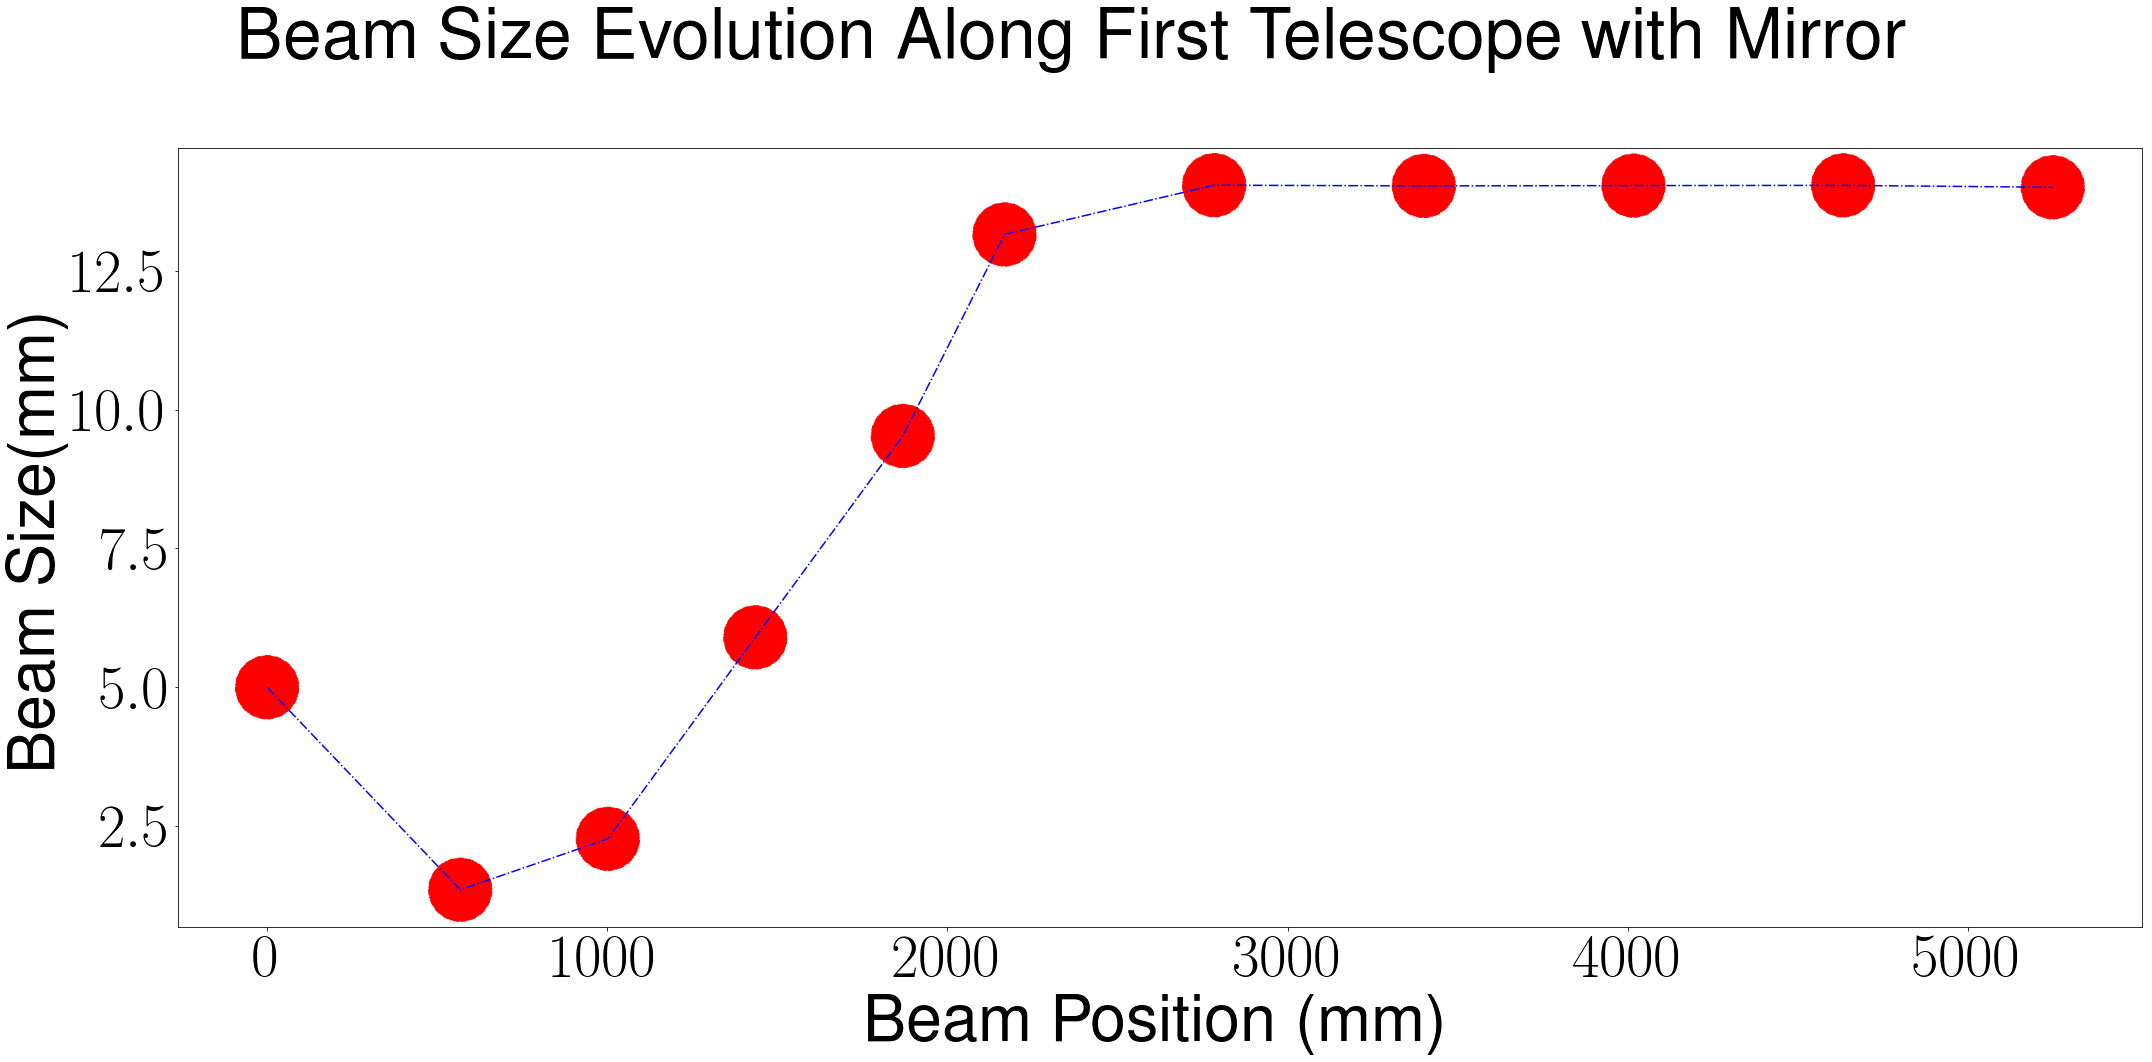

In [1]:
%run '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/utilities.ipynb'
from datetime import datetime
import sys
import os
import time

cpath= Popen(['pwd'], stdout=PIPE, stderr=PIPE).communicate()[0].decode('utf-8').rstrip()

f = filename_generator(cpath)
data_paths = data_pathfiles_generator(cpath)
m_datap = []
n_datap=[]
for i in data_paths:
    if 'run' in i:
        m_datap.append(i)
        
m_datap.insert(10, m_datap.pop(2))
for i in m_datap:
    print(i)
raw_data = data_generator(m_datap)

waists = np.multiply(2, fit_parameter_extractor(gaussian, raw_data)[2])
print(waists)
pos = [0]
t = np.arange(568,2070,433.706)
for i in t:
    pos.append(i)

t = np.arange(2168, 5260, 616.4)
for i in t:
    pos.append(i)

x = pos
print(x)
y = waists
cycol = cycle('bgrcmk')
fig = plt.figure(figsize=(30,15))
axes = fig.add_subplot(1, 1, 1)
axes.scatter(x, y, color = 'red', linestyle = '-.', s=4000)
axes.plot(x,y, c=next(cycol), linestyle = '-.')
axes.tick_params(axis='both',labelsize=55)
axes.legend(fontsize =55)
axes.set_xlabel(str('Beam Position (mm)'), fontsize=55+10)
axes.set_ylabel(str('Beam Size(mm)'), fontsize=55+10)
axes.tick_params(axis='both',labelsize=55+5)
axes.legend(loc = 'upper right', fontsize=55)
fig.suptitle('Beam Size Evolution Along First Telescope with Mirror$', fontsize=55+15)
fig.tight_layout()
fig.subplots_adjust(top=0.85)

fig.savefig(cpath+ '/'+'telescopewithmirror' + "-" + datetime.now().strftime("%Y-%m-%d-%H-%M-%S")+'.jpg', dp1=16000)
